In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
tf.keras.backend.set_floatx('float64')
from misc import *
from collections import deque
from nets import Q2, Actor
import random

In [20]:

class Q2(tf.keras.Model):
    def __init__(self, valreg=0):
        super(Q2,self).__init__()

        self.l1 = Dense(128, input_shape=(1,),kernel_initializer=tf.random_uniform_initializer(),
        bias_initializer = tf.random_uniform_initializer(),
        kernel_regularizer=tf.keras.regularizers.l1(valreg),
    activity_regularizer=tf.keras.regularizers.l2(valreg))

        self.l2 = Dense(12, kernel_regularizer=tf.keras.regularizers.l1(valreg),
    activity_regularizer=tf.keras.regularizers.l2(valreg),
    kernel_initializer=tf.random_uniform_initializer(),
    bias_initializer = tf.random_uniform_initializer())
        self.l3 = Dense(12, kernel_regularizer=tf.keras.regularizers.l1(valreg),
    activity_regularizer=tf.keras.regularizers.l2(valreg),
    kernel_initializer=tf.random_uniform_initializer(),
    bias_initializer = tf.random_uniform_initializer())
        
        self.l4 = Dense(12, kernel_regularizer=tf.keras.regularizers.l1(valreg),
    activity_regularizer=tf.keras.regularizers.l2(valreg),
    kernel_initializer=tf.random_uniform_initializer(),
    bias_initializer = tf.random_uniform_initializer())
        
        self.l5 = Dense(1, kernel_regularizer=tf.keras.regularizers.l1(valreg),
    activity_regularizer=tf.keras.regularizers.l2(valreg),
    kernel_initializer=tf.random_uniform_initializer(),
    bias_initializer = tf.random_uniform_initializer())

    def call(self, input):
        feat = tf.nn.sigmoid(self.l1(input))
        feat = tf.nn.sigmoid(self.l5(feat))
        return feat
        
    def predict(self, history_one):
        inp = np.expand_dims(history_one, axis=0)
        return np.squeeze(self(inp).numpy())

    def __str__(self):
        return self.name


In [30]:

def create_dataset_guess(size_dataset=10**3, splits=1):
    betas = np.arange(-1,0,.01)

    dataset = []
    for i in range(size_dataset):
        ph = np.random.choice([-1,1],1)[0]
        action_guess = np.random.choice([1.,-1.], 1, p=[.3,.7])[0]

        l = np.random.choice(range(len(betas)),1)[0]
        b = betas[l]

        b = -.7
        action_guess = np.random.choice([1.,1.],1)[0]
        p0 = Prob(ph*0.4, b, 0)
        outcome = np.random.choice([0.,1.], 1, p=[p0,1-p0])[0]

        outcome=0.
        po1=np.sum([Prob(pp*0.4,b,outcome) for pp in [-1,1]])
        probrew = Prob(action_guess*0.4, b, outcome)/po1  #UNKNOWN TO AGENT OF COURSE
        reward = np.random.choice([1.,0.],1, p=[probrew, 1-probrew])[0]
        dataset.append([ action_guess, reward])
    data = np.split(np.array(dataset), splits+(len(dataset)%splits ))
    return data

In [31]:
def epocheando(data):
    for batch in range(len(data)):
        entries = []
        labels=[]
        for k in data[batch]:
            #entriescat.append(np.expand_dims([k[0][1],k[0][2]], axis=0))
            entries.append(np.expand_dims(k[0], axis=0))
            labels.append(k[1])

        with tf.GradientTape() as tape:
            tape.watch(q2.trainable_variables)
            preds = q2(np.expand_dims(entries,axis=1))
            loss =tf.keras.losses.MSE(np.expand_dims(labels,axis=1),preds)
    #loss = tf.keras.losses.binary_crossentropy(np.expand_dims(labels,axis=1), preds)
            loss = tf.reduce_mean(loss)
            grads = tape.gradient(loss,q2.trainable_variables)
            opt.apply_gradients(zip(grads, q2.trainable_variables))
    return loss

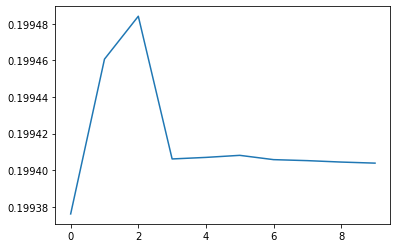

In [32]:
q2 = Q2()
data = create_dataset_guess(10**3, 25)
opt = tf.keras.optimizers.Adam(lr=10**-3)
l=[]
N = 10
for ep in range(N):
    l.append(epocheando(data))
    if ep%(N/10) == 1:
        print(ep, "/", N)
plt.plot(l)

In [33]:
for guess in [-1.,1.]:
    print(q2(np.array([[guess]])))

tf.Tensor([[0.28684845]], shape=(1, 1), dtype=float64)
tf.Tensor([[0.28033896]], shape=(1, 1), dtype=float64)


In [34]:
np.mean(data[0][np.where(data[0][:,0]==-1.)][:,1])

/home/cooper-cooper/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cooper-cooper/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [28]:
np.mean(data[0][np.where(data[0][:,0]==1.)][:,1])

0.23137254901960785

In [55]:
data = create_dataset_guess(10**3,1)

In [56]:
kk=0
k1=0

mm, mm1 = 0 , 0
for k in data[0]:
    if k[0][0] == 0.:
        kk+= 1
    elif k[0][0] == 1.:
        k1+=1
print(kk/len(data[0]))
print(k1/len(data[0]))

0.617
0.383


In [ ]:
h1, b = [0.,-1.], -.7

q2 = Q2()

i1 = np.expand_dims(h1,axis=0)
i2 = np.expand_dims([b],axis=0)
q2(i1,i2)

ii1 = np.expand_dims([i1,i1],axis=1)
ii2= np.expand_dims([i2, i2], axis=1)